In [203]:
import pandas as pd
import matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [2]:
df_allrich_infoP = pd.read_csv(r'/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/processed/allrich_processed.csv')
df_allrich_infoP.head()

,Unnamed: 0,Unnamed: 0.1,id,name,position,lastName,age,gender,country,image,worth_in_BUSD,worthChange_in_MSD,realTimeWorth,realTimePosition,Industry,Company
0,0,0,3614,Anant asavabhokhin & family,NaN,not_name_given,0.0,not_gender_given,not_country_given,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1,1,6176,Arash ferdowsi,NaN,not_name_given,0.0,not_gender_given,not_country_given,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2,2,4405,Banthoon lamsam & family,NaN,not_name_given,0.0,not_gender_given,not_country_given,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,3,3,7374,Bill adderley & family,NaN,not_name_given,0.0,not_gender_given,not_country_given,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,4,4,4404,Boris zingarevich,NaN,not_name_given,0.0,not_gender_given,not_country_given,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [222]:
#Dataframe created to see concentration (%) of Wealth. 
df_accum= df_allrich_infoP.groupby(['name','id'])['worth_in_BUSD'].agg('sum').sort_values(ascending= False).reset_index() 
df_accum['worth_perc'] = 100*df_accum['worth_in_BUSD']/df_accum['worth_in_BUSD'].sum()

df_accum['acummulate_worth'] = df_accum['worth_in_BUSD'].cumsum()
df_accum['acummulate_worth_perc'] = 100*df_accum['acummulate_worth']/df_accum['worth_in_BUSD'].sum()

df_accum['qty_rich'] = df_accum.reset_index().index+1
df_accum['acummulate_qty_perc'] = 100*df_accum['qty_rich']/df_accum['qty_rich'].max()


df_accum.to_csv(r'/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/processed/allrich_concentration.csv')

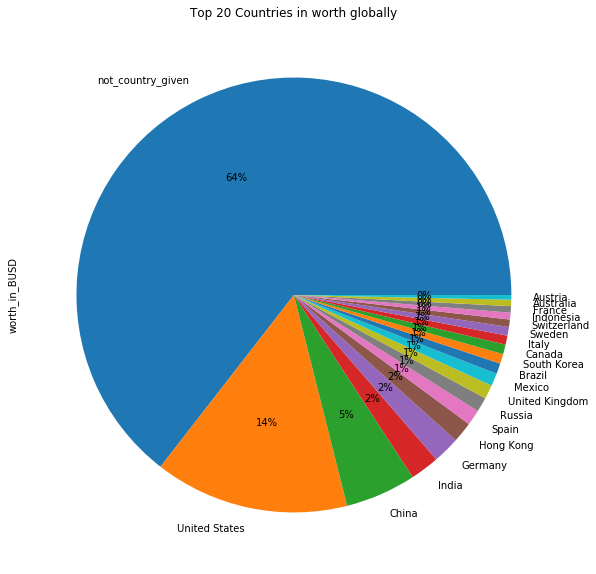

In [290]:
#Top 20 Countries in worth globally
df_countries= df_allrich_infoP.groupby('country')['worth_in_BUSD'].sum().sort_values(ascending = False).nlargest(20)

Top20_Countries_plot = df_countries.plot.pie(y='worth_in_BUSD', figsize=(10, 10),autopct = '%1.f%%', title='Top 20 Countries in worth globally')
fig = Top20_Countries_plot.get_figure()
fig.savefig('/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/results/top20_countries.png')

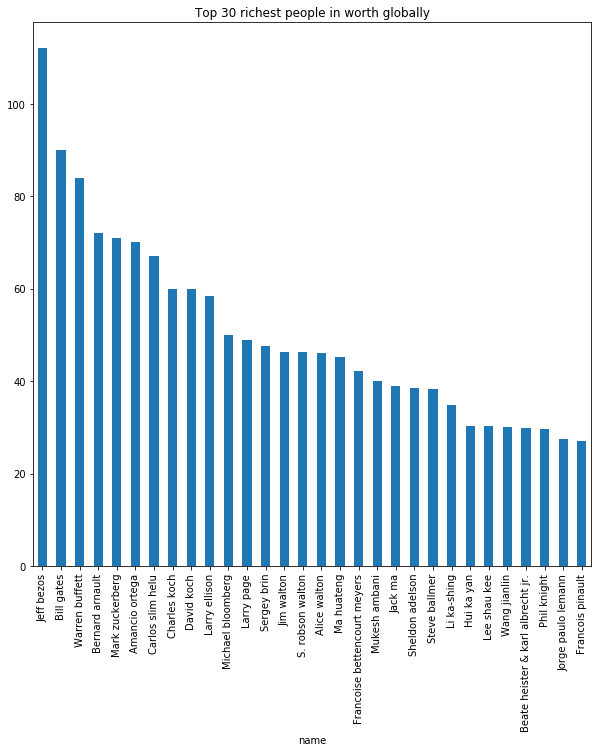

In [279]:
#Top 30 richest people in worth globally
df_countries= df_allrich_infoP.groupby('name')['worth_in_BUSD'].sum().sort_values(ascending = False).nlargest(30)

Top30_Richest_plot = df_countries.plot.bar(y='worth_in_BUSD', figsize=(10, 10), title = 'Top 30 richest people in worth globally')
fig = Top30_Richest_plot.get_figure()
fig.savefig('/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/results/top30_richest.png')
#Como divido las imágenes

#Top30_Richest_plot_pie = df_countries.plot.pie(y='worth_in_BUSD', figsize=(10, 10),autopct = '%1.1f%%', title='Top 30 richest people in worth globally')


In [209]:
#boxplot = df_allrich_infoP.boxplot(column=['worth_in_BUSD'], fontsize=12,figsize=(5, 20))

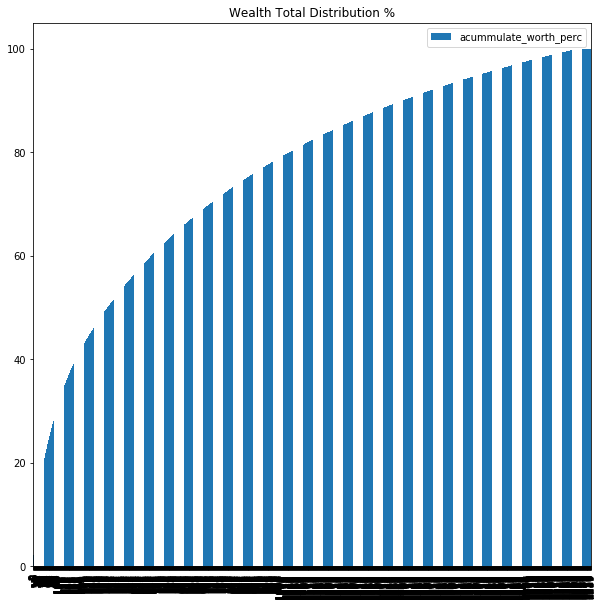

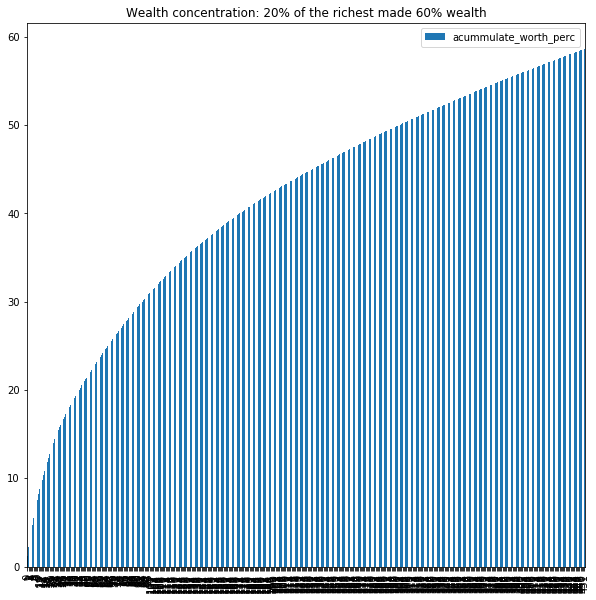

In [284]:

#Wealth Total distribution %
df_pareto1= df_accum[['qty_rich','acummulate_worth_perc']].sort_values(by=['acummulate_worth_perc'],ascending = True)
Pareto_plot1 = df_pareto1.plot.bar(y='acummulate_worth_perc', figsize=(10, 10), title = 'Wealth Total Distribution %')

#Wealth concentration: 20% of the richest made 60% wealth
df_pareto= df_accum[['qty_rich','acummulate_worth_perc']].sort_values(by=['acummulate_worth_perc'],ascending = True).nsmallest(452,'acummulate_worth_perc')
Pareto_plot = df_pareto.plot.bar(y='acummulate_worth_perc', figsize=(10, 10), title = 'Wealth concentration: 20% of the richest made 60% wealth')
fig = Pareto_plot.get_figure()
fig.savefig('/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/results/Wealth Distribution in 20% Richest.png')





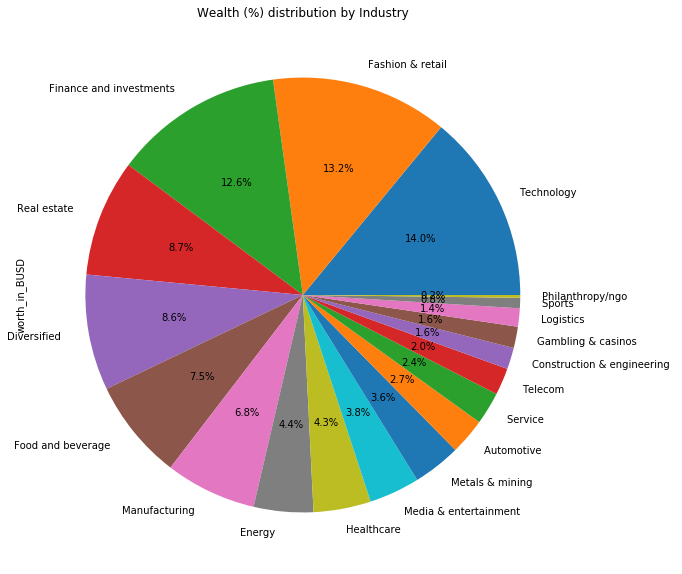

In [283]:
# Wealth distribution by Industry
df_industries= df_allrich_infoP.groupby('Industry')['worth_in_BUSD'].sum().sort_values(ascending = False)

Top30_Industries_plot = df_industries.plot.pie(y='worth_in_BUSD', figsize=(10, 10),autopct = '%1.1f%%', title='Wealth (%) distribution by Industry')
fig = Top30_Industries_plot.get_figure()
fig.savefig('/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/results/Wealth distribution by Industry.png')

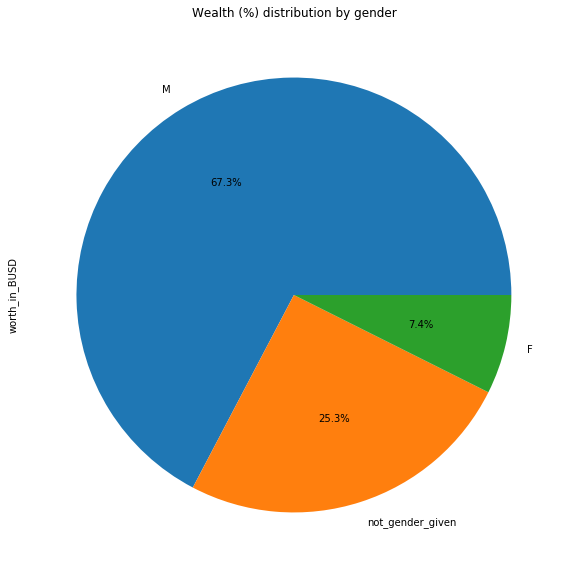

In [287]:
# Wealth distribution by gender
df_gender= df_allrich_infoP.groupby('gender')['worth_in_BUSD'].sum().sort_values(ascending = False)

Gender_plot = df_gender.plot.pie(y='worth_in_BUSD', figsize=(10, 10),autopct = '%1.1f%%', title='Wealth (%) distribution by gender')
fig = Gender_plot.get_figure()
fig.savefig('/home/usuario/Documentos/Ironhack/Ironhack-Module-1-Project---Commercial-Optimization/data/results/Wealth distribution by gender.png')

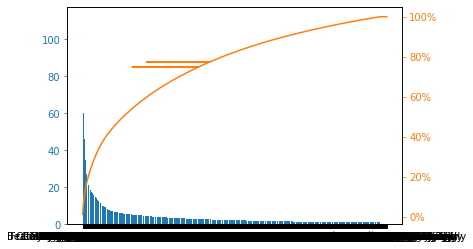

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots()
ax.bar(df_accum['name'], df_accum["worth_in_BUSD"], color="C0")
ax2 = ax.twinx()
ax2.plot(df_accum['name'], df_accum["acummulate_worth_perc"], color="C1", marker="D", ms=0)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()